# **Regresión Polinomica en Python**

La regresión polinómica utiliza el método de mínimos cuadrados para encontrar la curva polinómica que resulta en la menor suma de errores al cuadrado (RMSE: Root Mean Square Error).

La forma general de una regresión polinómica tendrá la forma: $Y = a_0 + a_1X + a_2X^2 + ···+a_nx^n$

# **Problema a resolver**

**Contexto:** Estamos simulando un escenario en el que se está considerando contratar a un nuevo empleado para nuestra empresa. El candidato, en la entrevista inicial, ha mencionado que en su último empleo desempeñaba el rol de Manager Regional y tenía un salario anual de 170.000€. Este ejercicio pretende evaluar su afirmación y establecer una base sólida para una futura negociación salarial.



# **Paso #1: Importamos las librerias necesarias para nuestro proyecto de Machine Learning**

Instalamos la libreria beautifultable

In [1]:
!pip install beautifultable

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures as Polinomio
from statsmodels.tools.eval_measures import rmse

# **Paso #2: Carga de Datos**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Simulacion/RP/Salarios2.csv')

In [ ]:
df.head()

,Posicion,Nivel,Salario
0,Analista,1,45000
1,Consultor Junior,2,50000
2,Consultor Senior,3,60000
3,Manager,4,80000
4,Manager General,5,110000


# **Paso #3: Hacemos una visualización de los datos para analizar el comportamiento de los mismos**

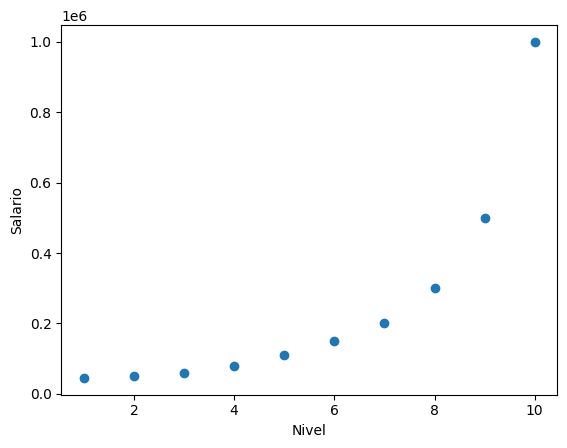

In [ ]:
plt.scatter(df['Nivel'], df['Salario'])
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

Al analizar los datos con el gráfico de dispersión, podemos ver que no tiene una tendencia lineal.

**Planteamiento del Problema:** En nuestro análisis de la estructura salarial de la empresa, hemos descubierto una interesante relación polinómica entre el nivel ocupacional de los empleados y su salario. Esta relación polinómica indica que el salario no aumenta de manera uniforme con cada ascenso de nivel. En cambio, observamos que los incrementos salariales varían de forma más compleja y posiblemente más acelerada a medida que los empleados avanzan a niveles superiores.

Por ejemplo, mientras que un empleado en un nivel inicial podría experimentar un aumento moderado de salario al pasar al siguiente nivel, los empleados en niveles más altos podrían ver incrementos sustancialmente mayores. Esto se debe a que la relación entre el nivel y el salario no sigue una simple línea recta, sino una curva que refleja cambios más pronunciados en el salario a niveles más altos.

Esta relación polinómica puede ser el resultado de varios factores, como la creciente responsabilidad, la escasez de habilidades especializadas y el impacto significativo en la toma de decisiones estratégicas en niveles superiores. Por lo tanto, en nuestra estructura salarial, consideramos importante reconocer no solo la progresión en términos de nivel, sino también la complejidad y el valor crecientes asociados con roles de mayor nivel.

Este patrón polinómico subraya la importancia de una estrategia salarial que vaya más allá de los incrementos lineales y considere la creciente contribución y el valor agregado que los empleados aportan en niveles más avanzados de su carrera.

# **Paso #3: Establecemos las variables independientes y dependientes**

In [ ]:
# 3. Crear variable y respuesta
X = df['Nivel'].values.reshape(-1,1) # Como X solo tiene 1 tenemos que 'reshape' para asegurar que siga siendo una matrix (array) y no un vector (-1,)
y = df['Salario'].values

# **Paso #4: Se definen los datos de entrenamiento y de validación**

En nuestro análisis actual, nos enfrentamos a la limitación de tener un conjunto de datos relativamente pequeño, compuesto únicamente por 10 registros. Dada esta cantidad limitada de datos, hemos tomado la decisión de no separarlos en conjuntos de entrenamiento y validación. Esto se debe a que la división de un conjunto de datos tan pequeño podría llevar a subconjuntos que no serían representativos ni suficientes para entrenar y validar efectivamente el modelo.

En situaciones donde los datos son escasos, como en nuestro caso, dividir el conjunto de datos puede resultar en que el modelo no tenga suficiente información para aprender adecuadamente las relaciones subyacentes. Además, la validación en un subconjunto muy pequeño podría no proporcionar una evaluación precisa de la capacidad del modelo para generalizar a nuevos datos.

Por lo tanto, en este escenario, hemos optado por utilizar todo el conjunto de datos para entrenar nuestro modelo. Aunque esta aproximación tiene sus desventajas, como el potencial de sobreajuste y la incapacidad de evaluar la generalización del modelo de manera independiente, es una decisión práctica dada la cantidad limitada de datos con los que contamos.

Para mitigar los riesgos asociados con esta decisión, planeamos emplear técnicas como la validación cruzada, si es posible, y buscamos adquirir más datos en el futuro para permitir una división más tradicional en conjuntos de entrenamiento y validación. Mientras tanto, seremos cautelosos al interpretar los resultados del modelo y consideraremos este contexto al hacer inferencias o tomar decisiones basadas en sus predicciones.

# **Paso #5: Modelamiento**

En nuestro proyecto, abordaremos el modelado de los datos mediante un enfoque estructurado en dos fases distintas, cada una con un modelo de regresión específico. Este enfoque metodológico está diseñado para proporcionarnos una comprensión profunda y matizada de las relaciones subyacentes en nuestros datos.

Al comparar los resultados de ambas fases, podremos evaluar la adecuación y eficacia de modelos más simples frente a modelos que capturan complejidades mayores. Este enfoque nos permitirá no solo elegir el modelo que mejor se ajuste a nuestros datos, sino también entender la naturaleza de las relaciones que estamos analizando.

# **Fase 1: Modelo de Regresión Lineal**

En la primera fase, implementaremos un modelo de regresión lineal. La razón para comenzar con este modelo es su simplicidad y transparencia. La regresión lineal, al ser un método directo y ampliamente comprendido, nos permitirá establecer una línea de base para la relación entre las variables independientes y la variable dependiente. Esta fase nos proporcionará una visión inicial y nos ayudará a identificar patrones generales y la fuerza de las asociaciones lineales en los datos.

In [ ]:
regresor_lineal = LR()
regresor_lineal.fit(X, y)

LinearRegression()

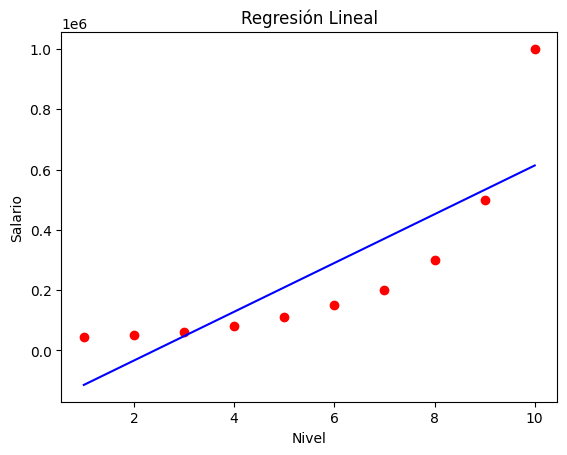

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regresor_lineal.predict(X), color = 'blue')
plt.title('Regresión Lineal')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

Al observar la gráfica resultante de nuestro modelo de regresión lineal, podemos notar que la línea azul, que representa la mejor línea recta ajustada a través de los datos, no sigue el patrón de los puntos rojos que representan nuestras observaciones reales. La discrepancia entre la línea del modelo y los datos sugiere que la relación entre el 'Nivel' y el 'Salario' no es lineal, y por lo tanto, el modelo de regresión lineal no puede capturar con precisión la naturaleza de esta relación.

La regresión lineal asume una relación directa y proporcional entre las variables independiente y dependiente, lo que significa que un aumento en una unidad en el 'Nivel' resultaría en un cambio constante en el 'Salario'. Sin embargo, los puntos de datos indican que el salario aumenta de una manera que no es constante; puede que aumente más rápidamente a medida que el nivel se hace más alto o puede haber otros patrones no lineales en juego.

Este tipo de patrón es un indicativo de que necesitamos un modelo más complejo que pueda manejar la no linealidad inherente a nuestros datos. La próxima fase de nuestro análisis, que incluirá un modelo de regresión polinomial, intentará abordar esta limitación. La regresión polinomial nos permitirá modelar relaciones curvilíneas, lo que parece ser más adecuado para los datos que tenemos, como sugieren los puntos que se desvían de la línea recta del modelo lineal actual.

# **Fase 2: Modelo de Regresión Polinomial**

Tras analizar los resultados del modelo lineal, avanzaremos a la segunda fase, donde implementaremos un modelo de regresión polinomial. Esta fase está motivada por la necesidad de explorar relaciones más complejas que posiblemente no se ajusten a un patrón lineal. La regresión polinomial nos permitirá modelar curvas y relaciones no lineales, proporcionando así una comprensión más detallada y posiblemente más precisa de los datos. Esta fase es particularmente crucial si, como sospechamos, las relaciones entre ciertas variables son intrínsecamente no lineales.

**1. Transformamos las variables**

In [ ]:
polinomizador = Polinomio(degree=4)
X_poli = polinomizador.fit_transform(X)

2. Aplicamos el modelo de regresión lineal con la transformación polinomica planteada en el item anterior

In [ ]:
regresor_polinomico = LR()
regresor_polinomico.fit(X_poli, y)
pd.DataFrame(X_poli).head(10)

,0,1,2,3,4
0,1.0,1.0,1.0,1.0,1.0
1,1.0,2.0,4.0,8.0,16.0
2,1.0,3.0,9.0,27.0,81.0
3,1.0,4.0,16.0,64.0,256.0
4,1.0,5.0,25.0,125.0,625.0
5,1.0,6.0,36.0,216.0,1296.0
6,1.0,7.0,49.0,343.0,2401.0
7,1.0,8.0,64.0,512.0,4096.0
8,1.0,9.0,81.0,729.0,6561.0
9,1.0,10.0,100.0,1000.0,10000.0


En el proceso de ajustar un modelo de regresión polinomial a nuestros datos, hemos transformado la variable independiente 'Nivel' utilizando una técnica que expande esta única variable en un conjunto de nuevas variables que representan las potencias de 'Nivel', hasta el grado cuatro. Este enfoque nos permite modelar una relación más compleja entre 'Nivel' y 'Salario' que no se limita a una línea recta.

Concretamente, al generar un polinomio de grado 4, creamos términos para 'Nivel' elevado a la potencia de 0, 1, 2, 3 y 4. El término de grado 0 corresponde a la potencia cero de cualquier número, que siempre es 1, y actúa como el término constante en nuestro modelo polinómico. Los términos de grado 1 a 4 representan 'Nivel' elevado a esa potencia específica, permitiendo que el modelo capture tendencias cuadráticas, cúbicas y cuárticas en los datos.

Por lo tanto, cada columna de nuestro conjunto de datos transformado corresponde a uno de estos términos polinómicos:

* Columna 0: Término constante ($Nivel^0$)
* Columna 1: Relación lineal ($Nivel^1$)
* Columna 2: Relación cuadrática ($Nivel^2$)
* Columna 3: Relación cúbica ($Nivel^3$)
* Columna 4: Relación cuártica ($Nivel^4$)

Este conjunto expandido de variables es lo que nuestro modelo de regresión polinomial utilizará para ajustarse a los datos, permitiendo un ajuste más flexible que puede adaptarse a las no linealidades observadas y proporcionar un modelo que refleje de manera más precisa la complejidad del comportamiento del 'Salario' en función del 'Nivel'.

**Gráfica de la función polinomica**

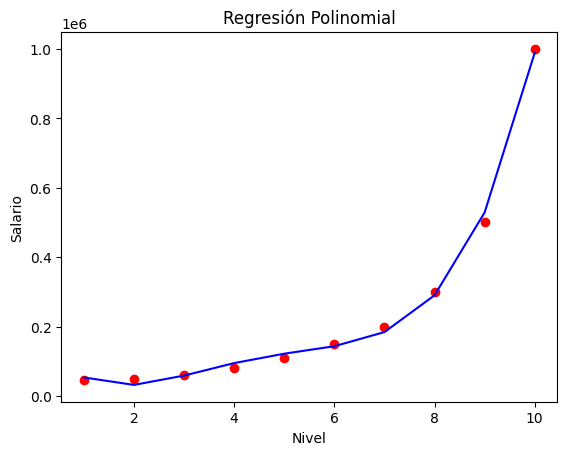

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regresor_polinomico.predict(X_poli), color = 'blue')
plt.title('Regresión Polinomial')
plt.xlabel('Nivel')
plt.ylabel('Salario')
plt.show()

# **Paso #6: Validación del modelo**



In [ ]:
RMSE_Lineal = np.sum(rmse(y, regresor_lineal.predict(X)))/len(y)
RMSE_Polinomico = np.sum(rmse(y, regresor_polinomico.predict(X_poli)))/len(y)
print('RMSE Lineal = ', RMSE_Lineal)
print('RMSE Polinomico = ', RMSE_Polinomico)

RMSE Lineal =  16338.873519272613
RMSE Polinomico =  1450.3234909626776


Al comparar los valores del Error Cuadrático Medio (RMSE) para los modelos de regresión lineal y polinómica, observamos una diferencia significativa en la precisión de las predicciones. El RMSE del modelo de regresión lineal es de 16338.873519272613, mientras que el del modelo polinómico es considerablemente menor, con un valor de 1450.3234909626776.

Esta notable reducción en el valor de RMSE para el modelo polinómico indica que las predicciones de este modelo están mucho más cercanas a los valores reales observados. En términos prácticos, el modelo polinómico tiene un promedio de error en sus predicciones que es aproximadamente un orden de magnitud menor que el del modelo lineal. Esto sugiere que el modelo polinómico es capaz de capturar la relación entre las variables 'Nivel' y 'Salario' de una manera mucho más precisa y efectiva.

La superioridad del ajuste del modelo polinómico puede deberse a su capacidad para modelar relaciones no lineales y complejas, que no son capturadas por el modelo lineal. Dado que los datos reales a menudo no siguen una tendencia lineal perfecta, el modelo polinómico ofrece una representación más flexible y adecuada de los patrones subyacentes en los datos, lo cual es evidente en el RMSE significativamente más bajo obtenido.

Por lo tanto, basándonos en el criterio de minimizar el RMSE, podemos justificar la elección del modelo polinómico sobre el modelo lineal para predecir el 'Salario' basado en el 'Nivel'. Esto nos permite tener mayor confianza en la precisión y fiabilidad de las predicciones realizadas por el modelo polinómico en nuestro contexto de deserción universitaria.

# **Conclusiones**

Hemos explorado cómo la Regresión Polinómica (RP) modela una relación polinómica entre la variable independiente (predictora) y la variable dependiente (respuesta), utilizando los datos que tenemos en nuestro conjunto de entrenamiento. Esta técnica extiende la funcionalidad de la regresión lineal, permitiéndonos aplicar la función polinómica derivada para realizar predicciones con nuevos datos en nuestro conjunto de validación.

Es común encontrar que la dinámica entre las variables en estudio no sigue una trayectoria lineal. En estos casos, un modelo de regresión lineal se queda corto, y un modelo de regresión polinómica puede ofrecer un ajuste mucho más fidedigno a los datos. Sin embargo, es crucial ser conscientes del riesgo de sobreajuste: un modelo excesivamente complejo podría adaptarse demasiado a los datos de entrenamiento, comprometiendo su capacidad para generalizar a nuevos conjuntos de datos. Por lo tanto, mientras buscamos un modelo que se ajuste adecuadamente, también debemos mantener un equilibrio para evitar interpretar el 'ruido' aleatorio como si fuera una señal significativa.

# **Trabajo Práctico: Análisis de la Relación entre Precio y Velocidad Máxima de Automóviles**

## **Objetivos:**
El objetivo de este trabajo es aplicar técnicas de regresión para analizar la relación entre el precio de los automóviles (araba_fiyat) y su velocidad máxima (araba_max_hiz). Se explorará tanto la regresión lineal como la polinomial para determinar cuál modelo proporciona el mejor ajuste a los datos proporcionados.

## **Datos:**
Se les proporcionará un conjunto de datos que incluye los siguientes campos:

araba_fiyat: Precio del automóvil (en miles de euros).
araba_max_hiz: Velocidad máxima del automóvil (en km/h).
Cada fila representa un automóvil diferente con sus respectivas características.

## **Instrucciones:**

**Exploración de Datos:** Realicen un análisis exploratorio inicial para familiarizarse con los datos. Esto debe incluir estadísticas descriptivas y visualizaciones como gráficos de dispersión.

**Modelo de Regresión Lineal:** Implementen un modelo de regresión lineal utilizando araba_fiyat como variable independiente y araba_max_hiz como variable dependiente.

**Modelo de Regresión Polinomial:** Construyan un modelo de regresión polinomial y determinen el grado del polinomio que proporciona el mejor ajuste. Consideren la posibilidad de sobreajuste y cómo evitarlo.

**Comparación y Evaluación:** Comparen los modelos de regresión lineal y polinomial utilizando métricas apropiadas (como RMSE). Discutan cuál modelo proporciona un mejor ajuste y por qué.

**Interpretación y Conclusiones:** Basándose en los resultados, ofrezcan una interpretación de la relación entre el precio y la velocidad máxima de los automóviles. ¿Es lineal o no lineal? ¿Cómo varía la velocidad máxima con el aumento del precio?



## **Formato de Entrega:**

Jupyter Notebook. Incluir descripción de las actividades e interpretación de resultados

## Fecha de Entrega:

La fecha límite para la entrega del trabajo es el Lunes 27 de Noviembre.
